<a href="https://colab.research.google.com/github/Ayu-Fitriani131/af-machinelearning/blob/master/InsyaAllah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PENERAPAN ALGORITMA RANDOM FOREST DENGAN OPTIMASI GRADIENT DESCENT DALAM KLASIFIKASI PENERIMA VAKSIN H1N1 DAN FLU MUSIMAN

**Masalah**

Bagaimana mengklasifikasikan para penerima vaksin H1N1 dan vaksin flu musiman

# 1. Import Libraries

In [ ]:
!pip install scikit-multilearn
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install catboost
!pip install scikeras[tensorflow]
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.0 MB/s eta 0:00:00
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-npw30860
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-npw30860
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras_contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101059 sha256=e584a1c49ae9ddda8a4cdabc0660d8ad6066bdfd80a19a7cbf33368dbbe022b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-354i_935/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras_contrib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
# General Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Utilities
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    StratifiedKFold
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder,
    PolynomialFeatures
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models and Algorithms
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    BaggingClassifier
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifierCV,
    PassiveAggressiveClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis
)
from sklearn.multioutput import MultiOutputClassifier
from skmultilearn.problem_transform import BinaryRelevance

# Advanced Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

# Metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    classification_report
)
from sklearn.calibration import calibration_curve

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

# Hyperparameter Tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# TensorFlow and Keras
import tensorflow as tf
from scikeras.wrappers import KerasClassifier


# 2. Introduction Data

**Data Source**

https://www.drivendata.org/competitions/66/flu-shot-learning/

**Data Description**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

features = pd.read_csv('/content/drive/MyDrive/UNNES/Dataset/training_set_features.csv')
labels = pd.read_csv('/content/drive/MyDrive/UNNES/Dataset/training_set_labels.csv')


Mounted at /content/drive


In [ ]:
### Joining the X & Y into a single dataframe ###
Z = labels
Z.drop('respondent_id',axis = 1,inplace = True)
frames = [features,Z]
data = pd.concat(frames,axis=1)

**Check Missing Value**

In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(data.isnull().any()) #isnull untuk cek data yang kosong

Check kolom yang memiliki missing data:
respondent_id                  False
h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            Fals

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', data.shape)

Shape awal:  (26707, 38)


In [ ]:
# Drop missing value
data = data.dropna()
print('\nDrop missing value:')
print(data)


Drop missing value:
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
1                  1           3.0             2.0                        0.0   
7                  7           1.0             0.0                        0.0   
10                10           2.0             1.0                        0.0   
11                11           1.0             2.0                        0.0   
15                15           1.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26681          26681           2.0             1.0                        0.0   
26683          26683           1.0             2.0                        1.0   
26690          26690           0.0             2.0                        0.0   
26699          26699           2.0             2.0                        0.0   
26703          26703           1.0             2.0                        0.0   

      

In [ ]:
print('Shape Sekarang: ', data.shape)

Shape Sekarang:  (6437, 38)


In [ ]:
data.duplicated().any()

False

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Buang data yang terduplikasi
data.drop_duplicates(inplace=True)

In [ ]:
print('Shape akhir: ', data.shape)

Shape akhir:  (6437, 38)


In [ ]:
# close to half the values of these columns are NULL so discarding
data.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

In [ ]:
str_cols = data.select_dtypes(include = 'object').columns
data[str_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
7,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA
10,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City"
11,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA
15,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"


In [ ]:
# All the NULL values are populated with the mode
for col in data.columns:
    if data[col].isnull().sum() and data[col].dtypes != 'object':
        data[col].loc[(X[col].isnull())] = data[col].median()
for col in data.columns:
    if data[col].isnull().sum() and data[col].dtypes == 'object':
        data[col].loc[(data[col].isnull())] = data[col].mode().max()

In [ ]:
data.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

LE = LabelEncoder()
for col in str_cols:
    data[col] = LE.fit_transform(data[col]) # Converts to int64

In [ ]:

# Membuat fitur agregasi untuk perilaku kebersihan
data['cleanliness'] = (
    data['behavioral_antiviral_meds'] +
    data['behavioral_avoidance'] +
    data['behavioral_face_mask'] +
    data['behavioral_wash_hands'] +
    data['behavioral_large_gatherings'] +
    data['behavioral_outside_home'] +
    data['behavioral_touch_face']
)

# Membuat fitur agregasi opini terkait vaksin H1N1 dan vaksin musiman
data['opinion_h1n1'] = (
    data['opinion_h1n1_vacc_effective'] +
    data['opinion_h1n1_risk'] -
    data['opinion_h1n1_sick_from_vacc']
)

data['opinion_seasonal'] = (
    data['opinion_seas_vacc_effective'] +
    data['opinion_seas_risk'] -
    data['opinion_seas_sick_from_vacc']
)

In [ ]:
data['cleanliness']

,cleanliness
1,4.0
7,3.0
10,3.0
11,2.0
15,1.0
...,...
26681,3.0
26683,5.0
26690,2.0
26699,4.0


In [ ]:
print(data[data["h1n1_vaccine"]==1].count()[1])

1935


In [ ]:

# Menambahkan fitur binary untuk tingkat kekhawatiran H1N1 >= 2
data['concern>=2'] = np.where(data['h1n1_concern'] >= 2, 1, 0)

# Menambahkan fitur binary untuk opini positif terhadap vaksin musiman
data['good_opinion_vacc'] = np.where(data['opinion_seas_vacc_effective'] == 3, 1, 0)

# Menambahkan fitur binary untuk pengetahuan yang baik terkait H1N1
data['good_knowledge'] = np.where(data['h1n1_knowledge'] == 2, 1, 0)

# Menambahkan fitur binary untuk risiko tinggi terhadap H1N1
data['risk'] = np.where(data['opinion_h1n1_risk'] >= 4, 1, 0)

# Membuat fitur kombinasi antara kekhawatiran dan pengetahuan H1N1
data['concern_knowledge'] = data['h1n1_concern'] + data['h1n1_knowledge']

# Menambahkan fitur kuadrat dari age_group untuk meningkatkan korelasi dengan probabilitas vaksinasi
data['age_group_squared'] = data['age_group'] ** 2

In [ ]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'cleanliness', 'opinion_h1n1', 'opinion_seasonal',
       'concern>=2', 'good_opinion_vacc', 'good_knowledge', 'risk',
       'concern_knowledge', 'age_group_squared'],
     

In [ ]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,seasonal_vaccine,cleanliness,opinion_h1n1,opinion_seasonal,concern>=2,good_opinion_vacc,good_knowledge,risk,concern_knowledge,age_group_squared
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,4.0,5.0,2.0,1,0,1,1,5.0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,3.0,6.0,5.0,0,0,0,0,1.0,4
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,3.0,3.0,5.0,1,0,0,0,3.0,4
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,2.0,3.0,5.0,0,0,1,0,3.0,9
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,4.0,2.0,0,0,0,0,2.0,1


In [ ]:
##### Removing seemingly irrelevant features ######

data.drop(['race','child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','household_adults','behavioral_antiviral_meds','behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds','marital_status',
           'behavioral_avoidance','behavioral_face_mask','income_poverty','hhs_geo_region','employment_status','education','census_msa'],axis=1,inplace = True)

Y_label = data[['h1n1_vaccine','seasonal_vaccine']]

In [ ]:
data.shape

(6437, 28)

In [ ]:
#### Appending Y labels to the end of the dataframe ####

data.drop(['respondent_id','h1n1_vaccine','seasonal_vaccine'],axis=1,inplace = True)
frames =[data,Y_label]
data = pd.concat(frames,axis=1)

In [ ]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,opinion_h1n1,opinion_seasonal,concern>=2,good_opinion_vacc,good_knowledge,risk,concern_knowledge,age_group_squared,h1n1_vaccine,seasonal_vaccine
1,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,...,5.0,2.0,1,0,1,1,5.0,1,0,1
7,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,2.0,...,6.0,5.0,0,0,0,0,1.0,4,1,1
10,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,...,3.0,5.0,1,0,0,0,3.0,4,1,1
11,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,3.0,5.0,0,0,1,0,3.0,9,1,1
15,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,...,4.0,2.0,0,0,0,0,2.0,1,0,0


In [ ]:
features = data.columns[:-2]
print(features)
labels = ['h1n1_vaccine', 'seasonal_vaccine']

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'sex', 'rent_or_own', 'household_children', 'cleanliness',
       'opinion_h1n1', 'opinion_seasonal', 'concern>=2', 'good_opinion_vacc',
       'good_knowledge', 'risk', 'concern_knowledge', 'age_group_squared'],
      dtype='object')


# Testing

In [ ]:
train,test = train_test_split(data,test_size = 0.2,shuffle = True)
train_x,train_y = train[features],train[labels]
test_x,test_y = test[features],test[labels]

In [ ]:
train_x.head()

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,household_children,cleanliness,opinion_h1n1,opinion_seasonal,concern>=2,good_opinion_vacc,good_knowledge,risk,concern_knowledge,age_group_squared
20714,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0.0,2.0,4.0,4.0,0,0,0,0,2.0,9
3088,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,...,1.0,3.0,2.0,4.0,1,0,0,0,3.0,0
16096,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,3.0,3.0,4.0,1,0,0,1,4.0,0
16827,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,2.0,2.0,4.0,3.0,0,0,0,0,2.0,1
843,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,0.0,1.0,5.0,5.0,0,0,0,0,2.0,4


In [ ]:
train_y.head()

,h1n1_vaccine,seasonal_vaccine
20714,0,0
3088,1,1
16096,0,0
16827,0,0
843,0,0


In [ ]:
train_x.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'sex', 'rent_or_own', 'household_children', 'cleanliness',
       'opinion_h1n1', 'opinion_seasonal', 'concern>=2', 'good_opinion_vacc',
       'good_knowledge', 'risk', 'concern_knowledge', 'age_group_squared'],
      dtype='object')

In [ ]:
def transform_test(Test_X):
    Test_X.drop(['respondent_id','health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

    # All the NULL values are populated with the mode

    d = Test_X
    str_cols = d.select_dtypes(include = 'object').columns

    ### LabelEcoding all categorical types #####
    for col in Test_X.columns:
        if Test_X[col].isnull().sum() and Test_X[col].dtypes != 'object':
            Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].median()
    for col in Test_X.columns:
        if Test_X[col].isnull().sum() and Test_X[col].dtypes == 'object':
            Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].mode().max()
    LE = LabelEncoder()
    for col in str_cols:
        Test_X[col] = LE.fit_transform(Test_X[col]) # Converts to int64

    data = d

    ### Synthesizing two new features cleanliness level of the individual and opinion of vaccine ####
    data['opinion'] = data['opinion_h1n1_vacc_effective'] + data['opinion_h1n1_risk']+\
                  data['opinion_h1n1_sick_from_vacc'] + data['opinion_seas_vacc_effective']+\
                  data['opinion_seas_risk'] + data['opinion_seas_sick_from_vacc']
    data['cleanliness'] =  data['behavioral_antiviral_meds']+ data['behavioral_avoidance']+\
                        data['behavioral_face_mask']+data['behavioral_wash_hands']+\
                       data['behavioral_large_gatherings'] + data['behavioral_outside_home']+\
                       data['behavioral_touch_face']
    data['opinion_h1n1'] = data['opinion_h1n1_vacc_effective'] + data['opinion_h1n1_risk']-\
                      data['opinion_h1n1_sick_from_vacc']
    data['opinion_seasonal'] = data['opinion_seas_vacc_effective']+\
                      data['opinion_seas_risk'] - data['opinion_seas_sick_from_vacc']

    data['concern>=2'] = np.where(data['h1n1_concern']>=2,1,0)
    data['good_opinion_vacc'] = np.where(data['opinion_seas_vacc_effective'] == 3,1,0) # 5 before
    data['good_knowledge'] = np.where(data['h1n1_knowledge'] == 2,1,0)
    data['risk'] = np.where(data['opinion_h1n1_risk']>=4,1,0)
    data['concern_knowledge'] = data['h1n1_concern']+data['h1n1_knowledge']
    data['a^2'] = data['age_group']*data['age_group']
    ###### Dropping other features #########
    data.drop(['race','child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','household_adults','behavioral_antiviral_meds','behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_antiviral_meds','marital_status',
           'behavioral_avoidance','behavioral_face_mask','income_poverty','hhs_geo_region','employment_status','education','census_msa'],axis=1,inplace = True)
    Test_X = data
    return Test_X

In [ ]:
Test_X = pd.read_csv('/content/drive/MyDrive/UNNES/Dataset/test_set_features.csv')
Test_X.shape

(26708, 36)

In [ ]:
Test_X = transform_test(Test_X)

In [ ]:
Test_X.isnull().sum()

,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_wash_hands,0
behavioral_touch_face,0
doctor_recc_h1n1,0
doctor_recc_seasonal,0
chronic_med_condition,0
health_worker,0
opinion_h1n1_vacc_effective,0
opinion_h1n1_risk,0


In [ ]:
Test_X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'sex', 'rent_or_own', 'household_children', 'opinion',
       'cleanliness', 'opinion_h1n1', 'opinion_seasonal', 'concern>=2',
       'good_opinion_vacc', 'good_knowledge', 'risk', 'concern_knowledge',
       'a^2'],
      dtype='object')

In [ ]:
train_x.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'sex', 'rent_or_own', 'household_children', 'cleanliness',
       'opinion_h1n1', 'opinion_seasonal', 'concern>=2', 'good_opinion_vacc',
       'good_knowledge', 'risk', 'concern_knowledge', 'age_group_squared'],
      dtype='object')

In [ ]:
Test_X.head()

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,opinion,cleanliness,opinion_h1n1,opinion_seasonal,concern>=2,good_opinion_vacc,good_knowledge,risk,concern_knowledge,a^2
0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,...,14.0,4.0,5.0,5.0,1,0,1,0,4.0,1
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,12.0,0.0,4.0,4.0,0,0,0,0,2.0,0
2,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,...,24.0,5.0,7.0,5.0,1,0,1,1,4.0,9
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,2.0,...,18.0,0.0,4.0,6.0,0,0,0,0,2.0,16
4,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,...,21.0,6.0,3.0,6.0,1,0,0,0,4.0,1


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import (
    ensemble, linear_model, naive_bayes, neighbors, tree,
    discriminant_analysis, model_selection, svm
)
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    # gaussian_process.GaussianProcessClassifier(),

    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    # SVM
    # svm.SVC(probability=True),
    # svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    # XGBoost
    XGBClassifier(),

    # CatBoost
    CatBoostClassifier(verbose=0),

    # Average Voting Model (AVM)
    VotingClassifier(estimators=[
        ('rf', ensemble.RandomForestClassifier()),
        ('gb', ensemble.GradientBoostingClassifier()),
        ('xgb', XGBClassifier())
    ], voting='soft'),

    # Artificial Neural Network (ANN)
    MLPClassifier(max_iter=1000),

    # OneVsRest Classifier
    OneVsRestClassifier(ensemble.RandomForestClassifier())
]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data['h1n1_vaccine']

#index through MLA and save performance to table
row_index = 0
data1 = data.copy()
for alg in MLA:
    data = data1
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data[features], data['h1n1_vaccine'], cv  = cv_split)
    #print(cv_results.keys())
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

    #save MLA predictions - see section 6 for usage
    alg.fit(data[features], data['h1n1_vaccine'])
    MLA_predict[MLA_name] = alg.predict(data[features])
    row_index+=1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.818168,0.023652,0.61371
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.818064,0.025117,1.293703
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'estimator': None, 'l...",0.816718,0.026447,0.276425
13,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': 'auto...",0.81646,0.027926,0.030769
19,CatBoostClassifier,{'verbose': 0},0.815217,0.020635,2.188127
16,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.815062,0.023611,0.030191
7,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.814803,0.024184,0.040274
20,VotingClassifier,"{'estimators': [('rf', RandomForestClassifier(...",0.812474,0.023427,1.159818
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.805901,0.030594,0.424373
22,OneVsRestClassifier,"{'estimator__bootstrap': True, 'estimator__ccp...",0.804917,0.020617,0.588837


Text(0, 0.5, 'Algorithm')

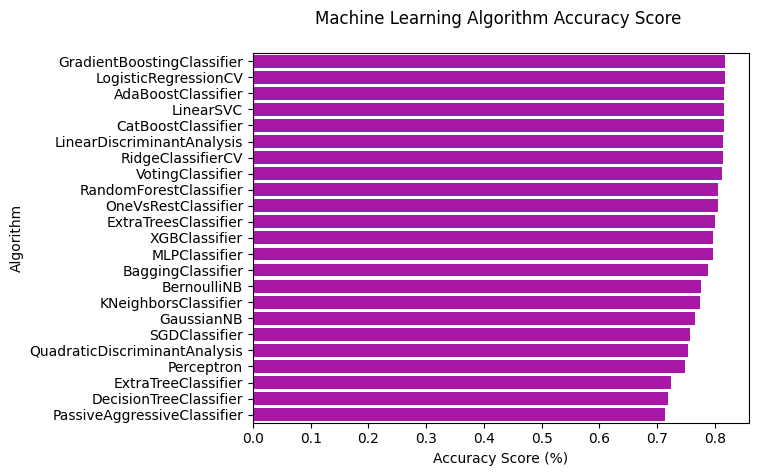

In [ ]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Gradient Boosting Classifier with Grid Search CV

In [ ]:
#### Utility Function to print the accuracy of the model ###

def find_acc(clf,X,truth,s):
    pred = clf.predict_proba(X.values)
    pred = pred.toarray()
    accuracy = roc_auc_score(truth,pred)
    print(s+" Accuracy is : ",accuracy*100)

In [ ]:
# Hyperparameter Grid for Gradient Boosting Classifier
grid_params = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 6, 10],
    "min_samples_split": [2, 5, 20, 50],
}

# Initialize Gradient Boosting Classifier
GBC = GradientBoostingClassifier()

# GridSearchCV for Hyperparameter Tuning
gs = GridSearchCV(estimator=GBC, param_grid=grid_params, n_jobs=-1, cv=3, verbose=1)


In [ ]:
# Binary Relevance Wrapper
clf = BinaryRelevance(classifier=gs, require_dense=[True, True])

# Training the Model
clf.fit(train_x, train_y)

# Evaluate on Training Data
find_acc(clf, train_x, train_y, 'Training')

# Evaluate on Test Data
find_acc(clf, test_x, test_y, 'Cross Validation')



Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Training Accuracy is :  89.35024959044024
Cross Validation Accuracy is :  86.66389207175533


In [ ]:
#### Random Forest Classifier with Grid Search CV for HPO #####

from sklearn.model_selection import GridSearchCV
grid_1 = {      "n_estimators"      : [100,200,500],
               "criterion"         : ["gini", "entropy"],
               "max_features"      : ['sqrt','log2',0.2,0.5,0.8],
               "max_depth"         : [3,4,6,10],
               "min_samples_split" : [2, 5, 20,50] }
RF=RandomForestClassifier()
gs = GridSearchCV(RF, grid_1, n_jobs=-1, cv=2,verbose = True)

### Training & Performance ###

clf = BinaryRelevance(classifier=gs, require_dense=[True,True])
clf.fit(train_x,train_y)
find_acc(clf,train_x,train_y,'Training')
find_acc(clf,test_x,test_y,'Cross Validation')

Fitting 2 folds for each of 480 candidates, totalling 960 fits
Fitting 2 folds for each of 480 candidates, totalling 960 fits
Training Accuracy is :  88.86827187463784
Cross Validation Accuracy is :  85.85820429444472
